In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
orig_data = pd.read_csv("train.csv")
orig_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
orig_data = orig_data.drop_duplicates()

In [4]:
orig_data.rename(columns={"BHK_NO.":"NUM_ROOMS", "TARGET(PRICE_IN_LACS)": "PRICE_IN_LACS"}, inplace=True)
orig_data.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'NUM_ROOMS', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'PRICE_IN_LACS'],
      dtype='object')

<Figure size 1000x1000 with 0 Axes>

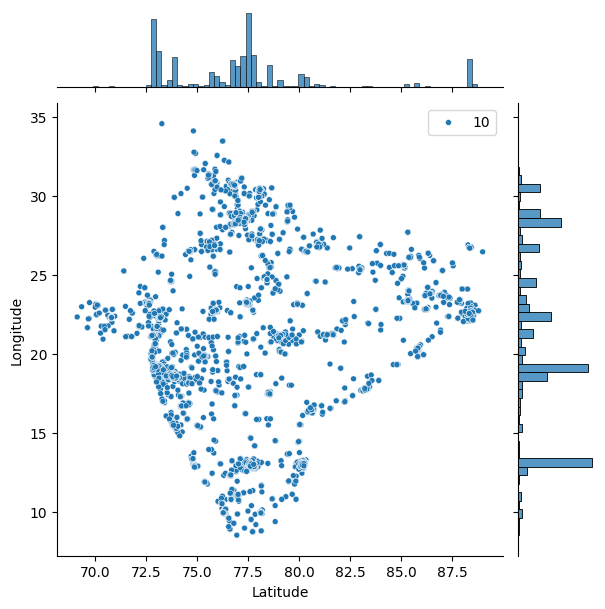

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [5]:
orig_data = orig_data[((orig_data["LATITUDE"] > 60) & (orig_data["LATITUDE"] < 90)) & ((orig_data["LONGITUDE"] > 5) & (orig_data["LONGITUDE"] < 36))]
plt.figure(figsize=(10, 10))
sns.jointplot(x = orig_data.LATITUDE.values, y=orig_data.LONGITUDE.values, size = 10)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()
sns.despine

In [6]:
print("BEDROOMS:",sorted(orig_data['NUM_ROOMS'].unique()))
print("SQUARE_FT minimum value:",orig_data['SQUARE_FT'].min())
print("SQUARE_FT maximum value:",orig_data['SQUARE_FT'].max())
print("PRICE_IN_LACS minimum value:",orig_data['PRICE_IN_LACS'].min())
print("PRICE_IN_LACS maximum value:",orig_data['PRICE_IN_LACS'].max())

BEDROOMS: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 20]
SQUARE_FT minimum value: 3.0
SQUARE_FT maximum value: 254545454.5
PRICE_IN_LACS minimum value: 0.25
PRICE_IN_LACS maximum value: 30000.0


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

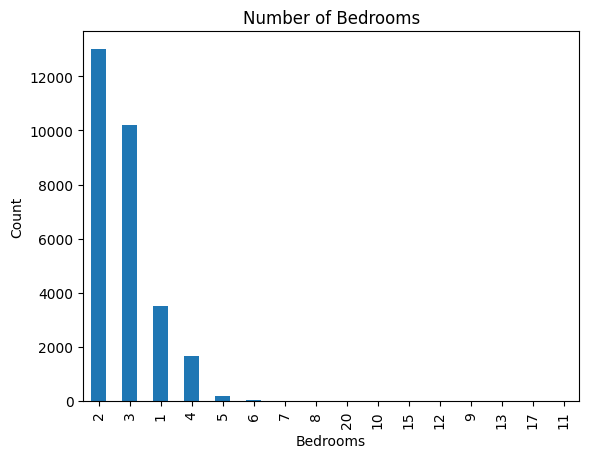

In [7]:
orig_data["NUM_ROOMS"].value_counts().plot(kind="bar")
plt.title("Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
sns.despine

In [8]:
orig_data[orig_data["NUM_ROOMS"]<9]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE_IN_LACS
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29445,Owner,0,0,2,BHK,1062.134891,1,1,"Tilakwadi,Belgaum",15.866670,74.500000,40.0
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [9]:
orig_data["CITY"] = orig_data["ADDRESS"].str.split(',').str[-1]
orig_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE_IN_LACS,CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata


In [10]:
orig_data["CITY"].value_counts()

CITY
Bangalore      4141
Lalitpur       2963
Mumbai         1984
Pune           1974
Noida          1715
               ... 
Nagaur            1
Palanpur          1
Bhadrak           1
Kurukshetra       1
Washim            1
Name: count, Length: 250, dtype: int64

In [11]:
city_count = orig_data["CITY"].value_counts()
cities_to_keep = city_count[city_count>=10].index
orig_data = orig_data[orig_data["CITY"].isin(cities_to_keep)]

In [20]:
print(len(cities_to_keep))
print(orig_data["CITY"].value_counts().min())
print(orig_data["CITY"].value_counts().max())
print((orig_data["CITY"].value_counts().max()+orig_data["CITY"].value_counts().min())/len(cities_to_keep))

113
10
4141
36.73451327433628


In [12]:
orig_data["CITY"].value_counts()

CITY
Bangalore      4141
Lalitpur       2963
Mumbai         1984
Pune           1974
Noida          1715
               ... 
Durg             11
Wardha           10
Kanchipuram      10
Karnal           10
Latur            10
Name: count, Length: 113, dtype: int64

In [113]:
for city in cities_to_keep:
    print(city)
# MAharashtra, Goa

Bangalore
Lalitpur
Mumbai
Pune
Noida
Kolkata
Chennai
Ghaziabad
Jaipur
Chandigarh
Faridabad
Mohali
Vadodara
Gurgaon
Surat
Nagpur
Lucknow
Indore
Bhubaneswar
Bhopal
Kochi
Visakhapatnam
Bhiwadi
Coimbatore
Goa
Dehradun
Mangalore
Ranchi
Sonipat
Gandhinagar
Secunderabad
Palghar
Kanpur
Raipur
Jamshedpur
Rajkot
Siliguri
Patna
Panchkula
Vijayawada
Agra
Jamnagar
Aurangabad
Raigad
Dharuhera
Thrissur
Durgapur
Gwalior
Meerut
Allahabad
Bahadurgarh
Anand
Ernakulam
Mysore
Kota
Bharuch
Varanasi
Valsad
Ratnagiri
Haridwar
Bhilai
Jalandhar
Udaipur
Vapi
Neemrana
Asansol
Jabalpur
Udupi
Kolhapur
Madurai
Panaji
Ludhiana
Guntur
Bhavnagar
Hubli
Dhanbad
Amravati
Jodhpur
Ahmednagar
Palakkad
Sindhudurg
Nellore
Solapur
Navsari
Ajmer
Bilaspur
Karjat
Shimla
Margao
Belgaum
Aligarh
Kottayam
Rudrapur
Junagadh
Pondicherry
Vizianagaram
Tirupati
Mathura
Jalgaon
Solan
Karad
Nainital
Kannur
Chandrapur
Alwar
Amritsar
Kakinada
Durg
Latur
Kanchipuram
Wardha
Karnal


In [110]:
# orig_data["NEIGHBOURHOOD"] = orig_data["ADDRESS"].str.split(',').str[-2]
# orig_data = orig_data[orig_data["CITY"] != "Maharashtra"]

# neighbourhood = {}
# for index, row in orig_data.iterrows():
#     city = row["CITY"]
#     neighbour = row["NEIGHBOURHOOD"]
#     if city in neighbourhood:
#         neighbourhood[city].append(neighbour)
#     else: 
#         neighbourhood[city] = [neighbour]

# state_rows = orig_data[orig_data['CITY'].str.lower() == "maharashtra"]

# # Step 2: Find matching rows with valid city names and same neighbourhood
# corrected_cities = []
# for index, row in state_rows.iterrows():
#     neighbour_hood = row['NEIGHBOURHOOD'].lower()
#     valid_cities = []
#     for city, neighbours in neighbourhood.items():
#         if neighbour_hood in [neighbour.lower() for neighbour in neighbours]:
#             valid_cities.append(city)
#     if valid_cities:
#         corrected_cities.append((index, valid_cities[0]))

# # Step 3: Replace state names with valid city names
# for index, city in corrected_cities:
#     orig_data.at[index, 'CITY'] = city


In [114]:
orig_data = orig_data[orig_data['SQUARE_FT']>200]

In [115]:
one_bhk_data = orig_data[(orig_data["NUM_ROOMS"]==1) & (orig_data['SQUARE_FT']>200)]
two_bhk_data = orig_data[(orig_data["NUM_ROOMS"]==2) & (orig_data['SQUARE_FT']>400)]
three_bhk_data = orig_data[(orig_data["NUM_ROOMS"]==3) & (orig_data['SQUARE_FT']>800)]
four_bhk_data = orig_data[(orig_data["NUM_ROOMS"]==4) & (orig_data['SQUARE_FT']>1200)]
five_bhk_data = orig_data[(orig_data["NUM_ROOMS"]==5) & (orig_data['SQUARE_FT']>1600)]
six_bhk_data = orig_data[(orig_data["NUM_ROOMS"]==6) & (orig_data['SQUARE_FT']>2000)]
seven_bhk_data = orig_data[(orig_data["NUM_ROOMS"]==7) & (orig_data['SQUARE_FT']>2500)]
eight_bhk_data = orig_data[(orig_data["NUM_ROOMS"]==8) & (orig_data['SQUARE_FT']>3000)]

In [116]:
print(one_bhk_data.shape)
print(two_bhk_data.shape)
print(three_bhk_data.shape)
print(four_bhk_data.shape)
print(five_bhk_data.shape)
print(six_bhk_data.shape)
print(seven_bhk_data.shape)
print(eight_bhk_data.shape)

(3098, 14)
(12069, 14)
(9572, 14)
(1560, 14)
(160, 14)
(41, 14)
(7, 14)
(5, 14)


In [117]:
print("Original data shape: ",orig_data.shape[0])
print("New data shape: ", one_bhk_data.shape[0]+two_bhk_data.shape[0]+three_bhk_data.shape[0]+four_bhk_data.shape[0]+five_bhk_data.shape[0]+six_bhk_data.shape[0]+seven_bhk_data.shape[0]+eight_bhk_data.shape[0])

Original data shape:  26689
New data shape:  26512


In [118]:
new_data = pd.concat([one_bhk_data, two_bhk_data, three_bhk_data, four_bhk_data, five_bhk_data, six_bhk_data, seven_bhk_data, eight_bhk_data], axis=0)
new_data.reset_index(drop=True, inplace=True)
print(new_data.shape)
new_data.head()

(26512, 14)


,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE_IN_LACS,CITY,NEIGHBOURHOOD
0,Owner,0,0,1,BHK,649.983750,1,1,"sanjay nagar,Raigad",13.03520,77.57720,20.0,Raigad,sanjay nagar
1,Dealer,0,0,1,BHK,630.000630,1,1,"Bandra (West),Mumbai",19.05444,72.84056,300.0,Mumbai,Bandra (West)
2,Dealer,1,1,1,BHK,864.067439,0,1,"Thane West,Lalitpur",19.18000,72.96333,82.0,Lalitpur,Thane West
3,Dealer,1,1,1,BHK,40606.195680,0,0,"Kanjur Marg (East),Lalitpur",24.69028,78.41889,9110.0,Lalitpur,Kanjur Marg (East)
4,Dealer,1,0,1,BHK,400.000000,0,1,"Kharadi,Pune",18.54380,73.94380,30.0,Pune,Kharadi


In [119]:
city_count = new_data["CITY"].value_counts()
cities_to_keep = city_count[city_count>=10].index
new_data = new_data[new_data["CITY"].isin(cities_to_keep)]

In [120]:
new_data["CITY"].value_counts()

CITY
Bangalore      4125
Lalitpur       2939
Mumbai         1975
Pune           1964
Noida          1713
               ... 
Alwar            11
Durg             11
Kanchipuram      10
Latur            10
Wardha           10
Name: count, Length: 111, dtype: int64

In [121]:
print(new_data[(new_data["BHK_OR_RK"]=="RK")].shape)
new_data[(new_data["BHK_OR_RK"]=="RK")]

(23, 14)


,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE_IN_LACS,CITY,NEIGHBOURHOOD
5,Dealer,0,0,1,RK,475.010326,1,1,"Balkum,Lalitpur",24.690280,78.418890,46.0,Lalitpur,Balkum
260,Dealer,0,0,1,RK,350.009052,1,1,"I C Colony,Lalitpur",24.690280,78.418890,58.0,Lalitpur,I C Colony
297,Dealer,1,0,1,RK,400.000000,0,1,"Sector 8 Airoli,Lalitpur",19.216097,72.821721,45.0,Lalitpur,Sector 8 Airoli
603,Owner,0,0,1,RK,375.006335,1,1,"Borivali (East),Lalitpur",19.235000,72.859800,74.0,Lalitpur,Borivali (East)
935,Dealer,0,0,1,RK,450.045005,1,1,"Sector 19 Ulwe,Lalitpur",19.049989,73.077321,30.0,Lalitpur,Sector 19 Ulwe
1291,Dealer,0,0,1,RK,350.008077,1,1,"Ramachandra Nagar,Lalitpur",22.720512,75.834224,65.0,Lalitpur,Ramachandra Nagar
1469,Dealer,1,1,1,RK,440.000000,0,1,"Dronagiri,Lalitpur",24.690280,78.418890,22.0,Lalitpur,Dronagiri
1507,Dealer,1,1,1,RK,449.982693,0,1,"Mulund (West),Lalitpur",19.175900,72.952200,65.0,Lalitpur,Mulund (West)
1542,Dealer,0,0,1,RK,360.023041,1,1,"Rawalpada,Lalitpur",24.690280,78.418890,50.0,Lalitpur,Rawalpada
1585,Dealer,1,1,1,RK,202.836663,0,0,"Bhandup (West),Lalitpur",19.147866,72.932609,39.9,Lalitpur,Bhandup (West)


In [122]:
new_data["NEIGHBOURHOOD"] = new_data["ADDRESS"].str.split(',').str[-2]
new_data[new_data["CITY"] == "Maharashtra"]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE_IN_LACS,CITY,NEIGHBOURHOOD


In [123]:
orig_data["NEIGHBOURHOOD"] = orig_data["ADDRESS"].str.split(',').str[-2]
orig_data = orig_data[orig_data["CITY"] != "Maharashtra"]

In [124]:
neighbourhood = {}
for index, row in orig_data.iterrows():
    city = row["CITY"]
    neighbour = row["NEIGHBOURHOOD"]
    if city in neighbourhood:
        neighbourhood[city].append(neighbour)
    else: 
        neighbourhood[city] = [neighbour]
print(neighbourhood)

{'Bangalore': ['Ksfc Layout', 'Jigani', 'Bileshivale', 'Hebbal', 'Garebhavipalya', 'Konanakunte', 'Kogilu', 'Vasanthapura', 'Basaveshwara Nagar', 'Yelahanka', 'Wilson Garden', 'CV Raman Nagar', 'Basapura', 'Ananth Nagar', 'Dodda Banaswadi', 'Electronics City Phase 1', 'Chandapura', 'Kaggadasapura', 'JP Nagar', 'Syndicate Bank Colony', 'Rasanna Colony', 'Budigere', 'Doddakannelli', 'Ferrar Nagar', 'Konanakunte', 'Roopena Agrahara', 'Suraksha Nagar', 'Kadugodi', 'Sarjapur Road', 'Electronic City Phase II', 'Suraksha Nagar', 'Harlur Road', 'Byagadadhenahalli', 'Doddakallasandra', 'Bhuvaneshwari Nagar', 'Aga Abbas Ali Road', 'Rajarajeshwari Nagar', 'Iblur Village', 'Thanisandra', 'Banashankari Stage VI', 'Kadugodi', 'Mysore Road', 'Chandapura', 'Kathreguppe', 'BTM 1st Stage', 'Mylasandra', 'Sathya Sai Layout', 'Nehru Nagar', 'Bandepalya', 'Devanahalli', 'KR Puram', 'Binny Pete', 'Kengeri', 'Udaya Nagar', 'Hennur Road', 'Kodigehalli', 'KR Puram', 'Phase 1 Kammasandra', 'Nagavarapalya', 'Dod

In [125]:
state_rows = new_data[new_data['CITY'].str.lower() == "maharashtra"]

# Step 2: Find matching rows with valid city names and same neighbourhood
corrected_cities = []
for index, row in state_rows.iterrows():
    neighbour_hood = row['NEIGHBOURHOOD'].lower()
    valid_cities = []
    for city, neighbours in neighbourhood.items():
        if neighbour_hood in [neighbour.lower() for neighbour in neighbours]:
            valid_cities.append(city)
    if valid_cities:
        corrected_cities.append((index, valid_cities[0]))

# Step 3: Replace state names with valid city names
for index, city in corrected_cities:
    new_data.at[index, 'CITY'] = city

In [126]:
print("Number of remaining records after renaming the cities based on their neighbourhood", new_data[new_data["CITY"] == "Maharashtra"].shape[0])
new_data[new_data["CITY"] == "Maharashtra"]

Number of remaining records after renaming the cities based on their neighbourhood 0


,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE_IN_LACS,CITY,NEIGHBOURHOOD


In [127]:
# Removing the remaining records left without renaming the city
new_data = new_data[new_data["CITY"] != "Maharashtra"]
new_data[new_data["CITY"] == "Maharashtra"]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE_IN_LACS,CITY,NEIGHBOURHOOD


In [128]:
# Removing the remaining records left without renaming the city
# new_data = new_data[new_data["CITY"] != "Maharashtra"]
new_data[new_data["CITY"] == "Goa"]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE_IN_LACS,CITY,NEIGHBOURHOOD
109,Owner,0,0,1,BHK,600.000000,1,1,"Siolim,Goa",15.620000,73.767000,33.0,Goa,Siolim
221,Owner,0,0,1,BHK,645.909242,1,1,"Benaulim,Goa",15.256963,73.933498,39.0,Goa,Benaulim
231,Owner,0,0,1,BHK,917.042889,1,1,"Candolim,Goa",15.518100,73.762600,65.0,Goa,Candolim
301,Dealer,0,0,1,BHK,699.650175,1,1,"Siolim,Goa",15.620000,73.767000,42.0,Goa,Siolim
387,Owner,0,0,1,BHK,591.966173,1,1,"Majorda,Goa",15.316110,73.919720,28.0,Goa,Majorda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24616,Owner,0,0,3,BHK,3700.414446,1,1,"Porvorim,Goa",15.401940,74.043330,250.0,Goa,Porvorim
24884,Owner,0,0,4,BHK,1829.924650,1,1,"Sirvodem,Goa",15.487991,74.194385,85.0,Goa,Sirvodem
25064,Owner,0,0,4,BHK,1313.131313,1,1,"Near Vasco Fish Market,Goa",15.640790,73.758963,52.0,Goa,Near Vasco Fish Market
25242,Dealer,0,0,4,BHK,2152.852530,1,1,"Caraenzalem,Goa",15.462648,73.804488,200.0,Goa,Caraenzalem


In [29]:
new_data = new_data[new_data["CITY"] != "Goa"]
new_data[new_data["CITY"] == "Goa"]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE_IN_LACS,CITY,NEIGHBOURHOOD


In [30]:
new_data["CITY"].unique().shape

(110,)

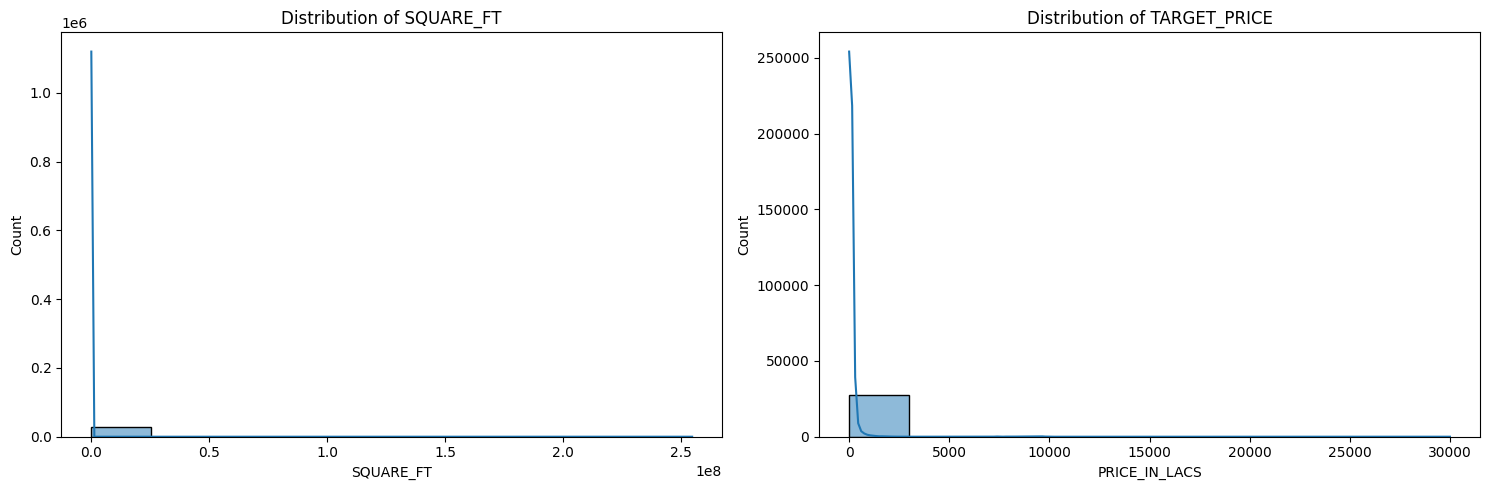

In [31]:
plt.figure(figsize=(15, 5))
# Distribution of log-transformed SQUARE_FT
plt.subplot(1, 2, 1)
sns.histplot(new_data['SQUARE_FT'], bins=10, kde=True)
plt.title('Distribution of SQUARE_FT')

# Distribution of log-transformed TARGET_PRICE
plt.subplot(1, 2, 2)
sns.histplot(new_data['PRICE_IN_LACS'], bins=10, kde=True)
plt.title('Distribution of TARGET_PRICE')

plt.tight_layout()
plt.show()

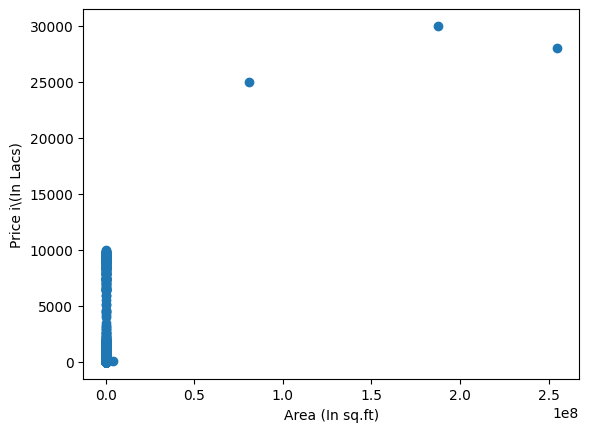

In [32]:
plt.scatter(new_data["SQUARE_FT"], new_data["PRICE_IN_LACS"])
plt.xlabel("Area (In sq.ft)")
plt.ylabel("Price i\(In Lacs)")
plt.show()

In [33]:
new_data = new_data[new_data["PRICE_IN_LACS"]<15000]
new_data = new_data[new_data["SQUARE_FT"]<100000]

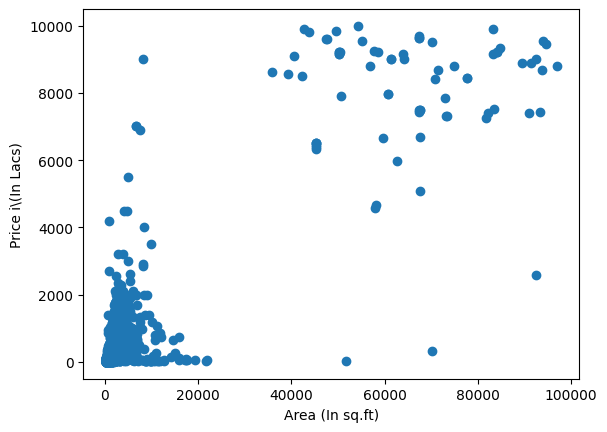

In [34]:
plt.scatter(new_data["SQUARE_FT"], new_data["PRICE_IN_LACS"])
plt.xlabel("Area (In sq.ft)")
plt.ylabel("Price i\(In Lacs)")
plt.show()

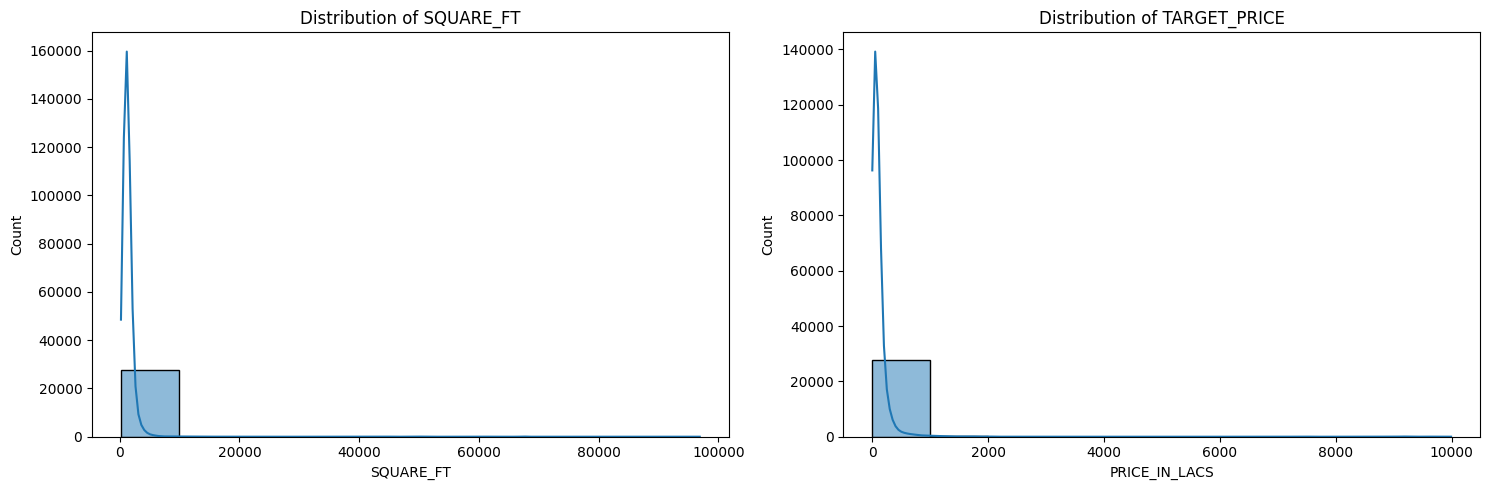

In [35]:
plt.figure(figsize=(15, 5))
# Distribution of log-transformed SQUARE_FT
plt.subplot(1, 2, 1)
sns.histplot(new_data['SQUARE_FT'], bins=10, kde=True)
plt.title('Distribution of SQUARE_FT')

# Distribution of log-transformed TARGET_PRICE
plt.subplot(1, 2, 2)
sns.histplot(new_data['PRICE_IN_LACS'], bins=10, kde=True)
plt.title('Distribution of TARGET_PRICE')

plt.tight_layout()
plt.show()

In [55]:
# Q1 = new_data[['SQUARE_FT', 'PRICE_IN_LACS']].quantile(0.25)
# Q3 = new_data[['SQUARE_FT', 'PRICE_IN_LACS']].quantile(0.75)
# IQR = Q3 - Q1

# threshold = 1.5

# # Detect outliers
# outliers = ((new_data[['SQUARE_FT', 'PRICE_IN_LACS']] < (Q1 - threshold * IQR)) |
#             (new_data[['SQUARE_FT', 'PRICE_IN_LACS']] > (Q3 + threshold * IQR)))

# cleaned_data = new_data[~outliers.any(axis=1)]

# print("Number of outliers detected and removed:")
# print(outliers.sum())

Number of outliers detected and removed:
SQUARE_FT        1488
PRICE_IN_LACS    2541
dtype: int64


In [59]:
# cleaned_data = new_data.copy()
new_data[['SQUARE_FT', 'PRICE_IN_LACS']] = np.log(new_data[['SQUARE_FT', 'PRICE_IN_LACS']])
# cleaned_data[['PRICE_IN_LACS']] = np.log(cleaned_data[['PRICE_IN_LACS']])

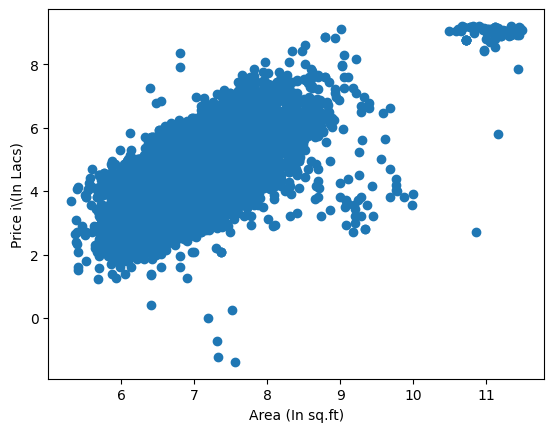

In [62]:
plt.scatter(new_data["SQUARE_FT"], new_data["PRICE_IN_LACS"])
plt.xlabel("Area (In sq.ft)")
plt.ylabel("Price i\(In Lacs)")
plt.show()

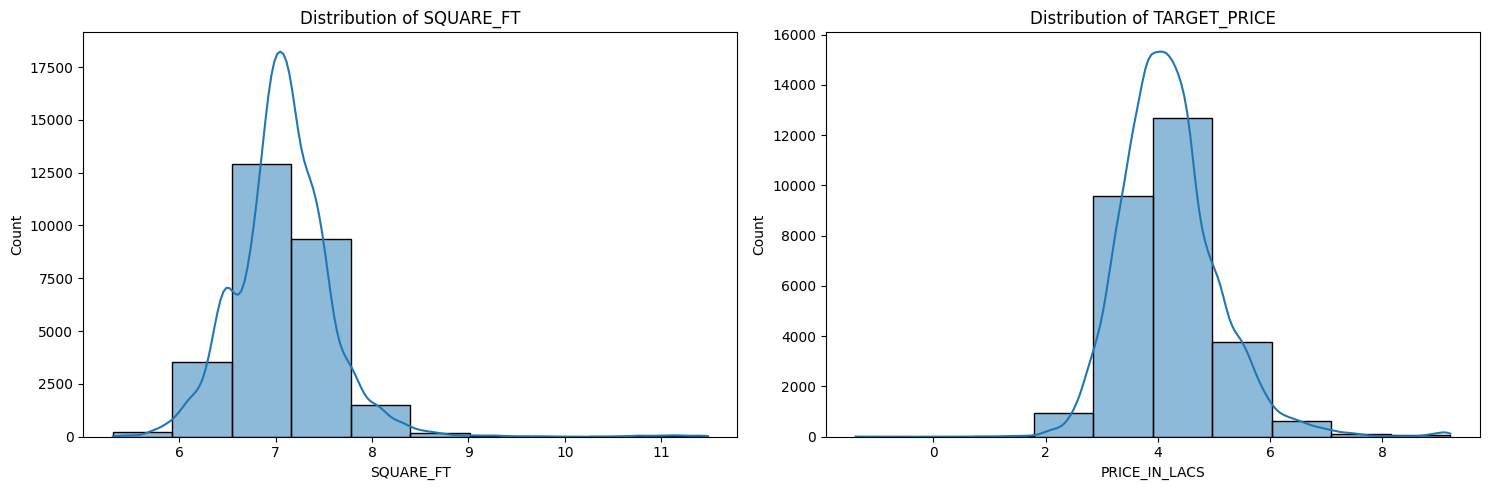

In [63]:
plt.figure(figsize=(15, 5))
# Distribution of log-transformed SQUARE_FT
plt.subplot(1, 2, 1)
sns.histplot(new_data['SQUARE_FT'], bins=10, kde=True)
plt.title('Distribution of SQUARE_FT')

# Distribution of log-transformed TARGET_PRICE
plt.subplot(1, 2, 2)
sns.histplot(new_data['PRICE_IN_LACS'], bins=10, kde=True)
plt.title('Distribution of TARGET_PRICE')

plt.tight_layout()
plt.show()

In [64]:
new_data["AVG_SQFT_PER_ROOM"] = new_data["SQUARE_FT"] / new_data["NUM_ROOMS"]
new_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE_IN_LACS,CITY,NEIGHBOURHOOD,AVG_SQFT_PER_ROOM
0,Owner,0,0,1,BHK,6.476947,1,1,"sanjay nagar,Raigad",13.03520,77.57720,2.995732,Raigad,sanjay nagar,6.476947
1,Dealer,0,0,1,BHK,6.445721,1,1,"Bandra (West),Mumbai",19.05444,72.84056,5.703782,Mumbai,Bandra (West),6.445721
2,Dealer,1,1,1,BHK,6.761651,0,1,"Thane West,Lalitpur",19.18000,72.96333,4.406719,Lalitpur,Thane West,6.761651
3,Dealer,1,1,1,BHK,10.611676,0,0,"Kanjur Marg (East),Lalitpur",24.69028,78.41889,9.117128,Lalitpur,Kanjur Marg (East),10.611676
4,Dealer,1,0,1,BHK,5.991465,0,1,"Kharadi,Pune",18.54380,73.94380,3.401197,Pune,Kharadi,5.991465


Text(0.5, 1.0, 'Distribution of AVG_SQFT_PER_ROOM')

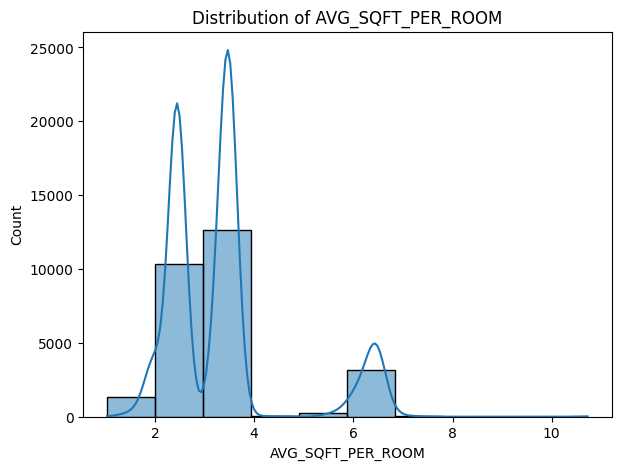

In [65]:
plt.figure(figsize=(15, 5))
# Distribution of log-transformed SQUARE_FT
plt.subplot(1, 2, 1)
sns.histplot(new_data['AVG_SQFT_PER_ROOM'], bins=10, kde=True)
plt.title('Distribution of AVG_SQFT_PER_ROOM')


In [87]:
cleaned_data = new_data[new_data["BHK_OR_RK"]!="RK"]
cleaned_data = cleaned_data.drop(columns=["ADDRESS", "BHK_OR_RK", "NEIGHBOURHOOD", "UNDER_CONSTRUCTION", "RESALE"], axis=1)
# cleaned_data = cleaned_data.drop(columns=["POSTED_BY", "READY_TO_MOVE", "CITY"], axis=1)

In [88]:
cleaned_data.head()

,POSTED_BY,RERA,NUM_ROOMS,SQUARE_FT,READY_TO_MOVE,LONGITUDE,LATITUDE,PRICE_IN_LACS,CITY,AVG_SQFT_PER_ROOM
0,Owner,0,1,6.476947,1,13.03520,77.57720,2.995732,Raigad,6.476947
1,Dealer,0,1,6.445721,1,19.05444,72.84056,5.703782,Mumbai,6.445721
2,Dealer,1,1,6.761651,0,19.18000,72.96333,4.406719,Lalitpur,6.761651
3,Dealer,1,1,10.611676,0,24.69028,78.41889,9.117128,Lalitpur,10.611676
4,Dealer,0,1,5.991465,0,18.54380,73.94380,3.401197,Pune,5.991465


In [89]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cleaned_data["CITY"] = label_encoder.fit_transform(cleaned_data["CITY"])

In [90]:
cleaned_data = pd.get_dummies(data=cleaned_data, columns=["POSTED_BY"], dtype="int64")
cleaned_data.head()

,RERA,NUM_ROOMS,SQUARE_FT,READY_TO_MOVE,LONGITUDE,LATITUDE,PRICE_IN_LACS,CITY,AVG_SQFT_PER_ROOM,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
0,0,1,6.476947,1,13.03520,77.57720,2.995732,84,6.476947,0,0,1
1,0,1,6.445721,1,19.05444,72.84056,5.703782,69,6.445721,0,1,0
2,1,1,6.761651,0,19.18000,72.96333,4.406719,59,6.761651,0,1,0
3,1,1,10.611676,0,24.69028,78.41889,9.117128,59,10.611676,0,1,0
4,0,1,5.991465,0,18.54380,73.94380,3.401197,83,5.991465,0,1,0


<Axes: >

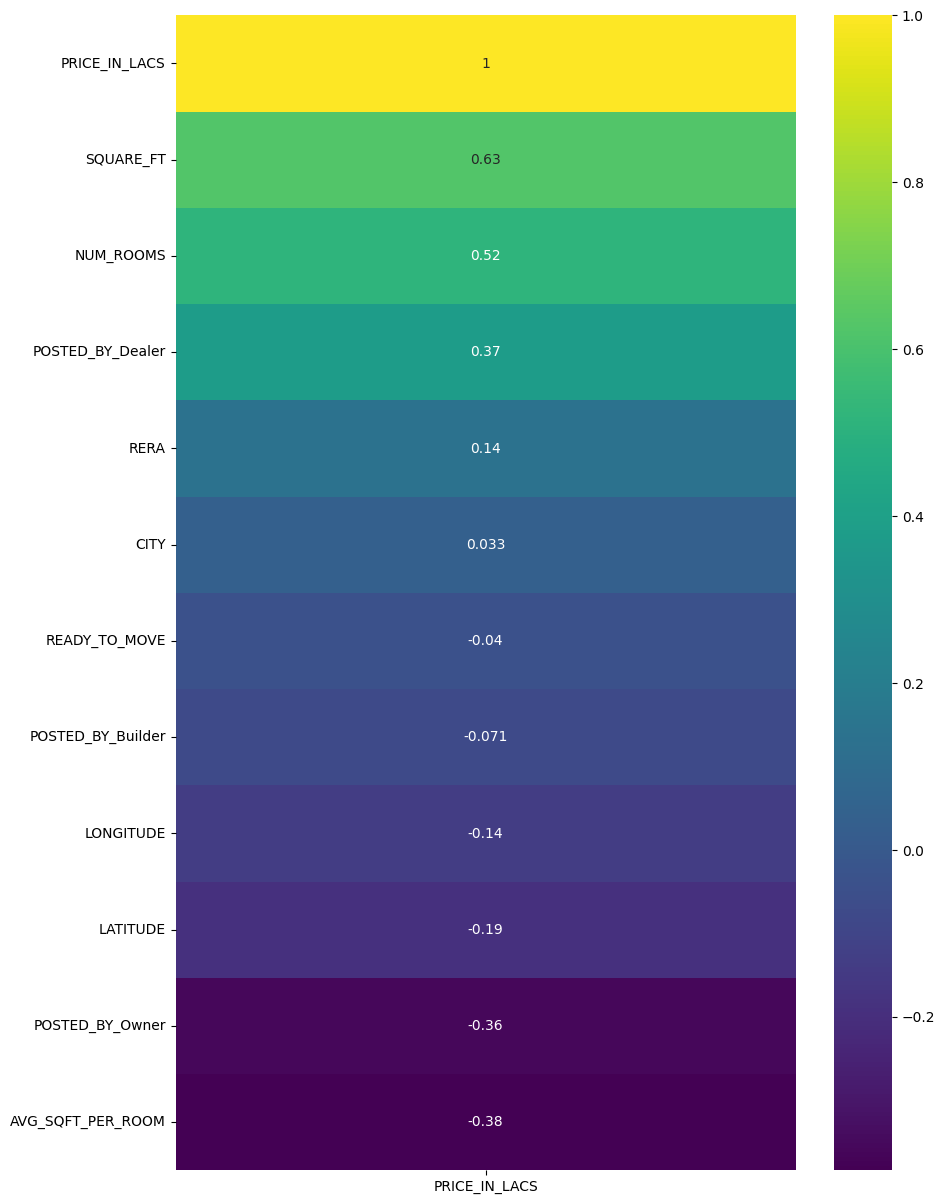

In [91]:
plt.figure(figsize=(10, 15))
# Plotting the heatmap with respect to the correlation of the features with the target variable 'SalePrice'
sns.heatmap(cleaned_data.corr()[['PRICE_IN_LACS']].sort_values(by='PRICE_IN_LACS', ascending=False), annot=True, cmap='viridis')


In [129]:
cleaned_data.columns

Index(['RERA', 'NUM_ROOMS', 'SQUARE_FT', 'READY_TO_MOVE', 'LONGITUDE',
       'LATITUDE', 'PRICE_IN_LACS', 'CITY', 'AVG_SQFT_PER_ROOM',
       'POSTED_BY_Builder', 'POSTED_BY_Dealer', 'POSTED_BY_Owner'],
      dtype='object')

In [130]:
x = cleaned_data.drop(columns=["PRICE_IN_LACS"], axis=1)
y = cleaned_data["PRICE_IN_LACS"]

In [131]:
feature_names = x.columns
feature_names

Index(['RERA', 'NUM_ROOMS', 'SQUARE_FT', 'READY_TO_MOVE', 'LONGITUDE',
       'LATITUDE', 'CITY', 'AVG_SQFT_PER_ROOM', 'POSTED_BY_Builder',
       'POSTED_BY_Dealer', 'POSTED_BY_Owner'],
      dtype='object')

In [94]:
from sklearn.preprocessing import StandardScaler

# Min-Max Scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [96]:
x_train[0]

array([-0.68902233,  0.76196038,  1.11005377,  0.46323721,  1.62856721,
       -0.0956837 ,  0.60768225, -0.64107942, -0.14160822, -1.30239897,
        1.35910092])

In [103]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [104]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(min_samples_split=2)
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [105]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=400, max_depth=10, min_samples_split=2, learning_rate=0.01, loss="absolute_error")
gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='absolute_error',
                          max_depth=10, n_estimators=400)

In [132]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Model Score
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Calculate R2
    r2 = r2_score(y_test, y_pred)
    
    # Calculate Adjusted R2
    n = len(y_test)
    p = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    
    return train_score, test_score, mae, rmse, r2, adj_r2

# Assuming you have already trained and tested your models and stored them in variables
# linear_regression_model, decision_tree_model, random_forest_model, gradient_boosting_model

# Evaluate Linear Regression model
train_score_lr, test_score_lr, mae_lr, rmse_lr, r2_lr, adj_r2_lr = evaluate_model(linear, x_test, y_test)

# Evaluate Decision Tree model
train_score_dt, test_score_dt, mae_dt, rmse_dt, r2_dt, adj_r2_dt = evaluate_model(dt, x_test, y_test)

# Evaluate Random Forest model
train_score_rf, test_score_rf, mae_rf, rmse_rf, r2_rf, adj_r2_rf = evaluate_model(rf, x_test, y_test)

# Evaluate Gradient Boosting model
train_score_gb, test_score_gb, mae_gb, rmse_gb, r2_gb, adj_r2_gb = evaluate_model(gbr, x_test, y_test)

# Print the results
print("Linear Regression:")
print("Train score:", train_score_lr)
print("Test Score:", test_score_lr)
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R2:", r2_lr)
print("Adjusted R2:", adj_r2_lr)
print()

print("Decision Tree:")
print("Train score:", train_score_dt)
print("Test Score:", test_score_dt)
print("MAE:", mae_dt)
print("RMSE:", rmse_dt)
print("R2:", r2_dt)
print("Adjusted R2:", adj_r2_dt)
print()

print("Random Forest:")
print("Train score:", train_score_rf)
print("Test Score:", test_score_rf)
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R2:", r2_rf)
print("Adjusted R2:", adj_r2_rf)
print()

print("Gradient Boosting:")
print("Train score:", train_score_gb)
print("Test Score:", test_score_gb)
print("MAE:", mae_gb)
print("RMSE:", rmse_gb)
print("R2:", r2_gb)
print("Adjusted R2:", adj_r2_gb)


Linear Regression:
Train score: 0.5671767150350548
Test Score: 0.5711566654034586
MAE: 0.44641398955203415
RMSE: 0.5789626707641552
R2: 0.5711566654034586
Adjusted R2: 0.5705897531716881

Decision Tree:
Train score: 0.9984760335598261
Test Score: 0.7421643192524705
MAE: 0.289135864842675
RMSE: 0.44892391274824384
R2: 0.7421643192524705
Adjusted R2: 0.7418234716995054

Random Forest:
Train score: 0.9770793699511449
Test Score: 0.8425768601896165
MAE: 0.22841062865874623
RMSE: 0.35078055908230676
R2: 0.8425768601896165
Adjusted R2: 0.8423687536473843

Gradient Boosting:
Train score: 0.896311626580101
Test Score: 0.8318285079560674
MAE: 0.23811464121432796
RMSE: 0.36255793910807643
R2: 0.8318285079560674
Adjusted R2: 0.831606192559783


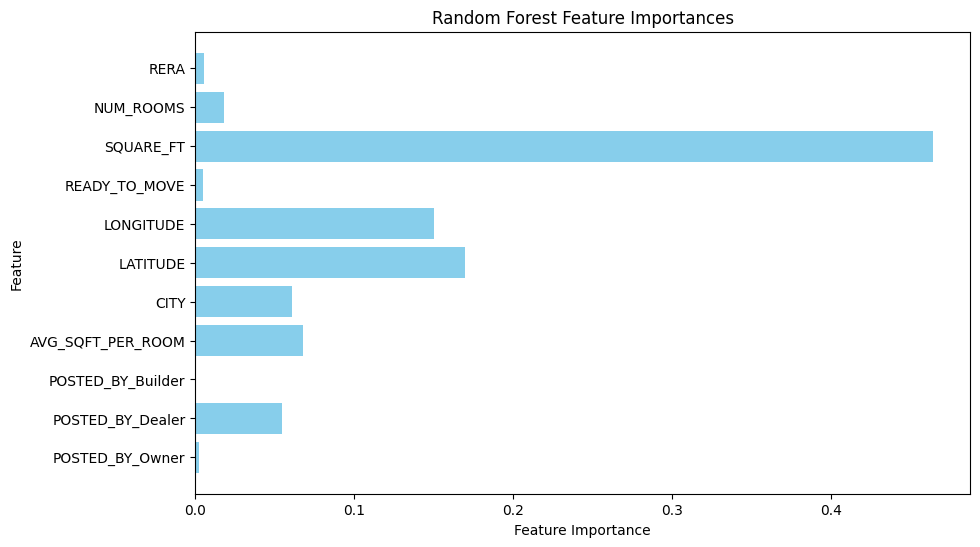

In [102]:
feature_importances = rf.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()